# <h2><b> Đồ án thực hành </b></h2>
<h1 style='color:red;text-align:center;font-size:35px'><b>Chủ đề: Dự đoán giá rượu vang</b></h1>

# <h1 style='color:blue;text-align:center;font-size:30px'><b>Phần II</b></h1>

# <h3>Các thành viên trong nhóm</h3>
<li> Phan Xuân Hoài - 20120481 </li>
<li> Lê Kinh Luân - 1612355 </li>
<li> Nguyễn Minh Nghĩa - 20120534</li>
<li> Phạm Quốc Hưng - 19120522</li>

### Import những thư viện cần thiết

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
sns.set_theme()

import os
import re
import statistics
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgray'})
import math
import warnings
warnings.filterwarnings('ignore')

In [139]:
import sys
sys.executable

'C:\\Users\\LUAN\\anaconda3\\python.exe'

In [140]:
cd champagne/champagne

[WinError 3] The system cannot find the path specified: 'champagne/champagne'
C:\Users\LUAN\Documents\GitHub\-NMKHDL_20_21\champagne\champagne


### Đọc file 'champagnes_info_cleaned.csv' vào dataframe df

In [141]:
df = pd.read_csv('./dataset/champagne_info_cleaned.csv', index_col=0)
df.head(10)

,Ma_sp,Ten_sp,Gia,Xuat_xu,Nong_do,Dung_tich,Giong_nho,Mau_sac,Loai_ruou,Thuong_hieu,Vung_lam_vang
0,VNPV-3958,Rượu Champagne Bottega Stardust Prosecco,3563000.0,Ý,11.0,750.0,Glera,vàng rơm nhạt,Rượu Champagne,Bottega,Veneto
1,VNPV-9463,Rượu Champagne Carbon F1,8517000.0,Pháp,12.0,750.0,"Chardonnay,Pinot meunier,Pinot Noir",trắng,Rượu Champagne,Delamotte,Champagne
2,VNPV1-1823,Rượu Champagne Charles Mignon Premium Reserve,1641000.0,Pháp,13.5,750.0,"Chardonnay,Pinot meunier,Pinot Noir",vàng,Rượu Champagne,Charles Mignon,Champagne
3,VNPV-836,Rượu Champagne De Castellane Brut,753000.0,Pháp,11.0,375.0,Chardonnay,xanh nhạt,Rượu Champagne,De Castellane,Champagne
4,VNPV-4233,Rượu Champagne Delamotte Blanc De Blancs,3810000.0,Pháp,12.5,750.0,Chardonnay,trắng trong,Rượu Champagne,Delamotte,Champagne
5,VNPV-1956,Rượu Champagne Delamotte Brut,1761000.0,Pháp,12.0,750.0,Chardonnay,vàng,Rượu Champagne,Delamotte,Champagne
6,VNPV-3667,Rượu Champagne Delamotte Rose,2956000.0,Pháp,12.0,750.0,"Chardonnay,Pinot Noir,Pinot Meunier",hồng,Rượu Champagne,Delamotte,Champagne
7,VNPV-1976,Rượu Champagne Duval Leroy Thierry Drapeau,1779000.0,Pháp,12.5,750.0,Chardonnay,vàng,Rượu Champagne,Champagne Duval Leroy,Champagne
8,VNTK3-480,Rượu Champagne JP Chenet Brut Blanc,480000.0,Pháp,13.0,750.0,Chardonnay,đỏ đậm,Rượu Vang Nổ,JP Chenet,Pays d’Oc
9,VNBMF-744,Rượu Champagne JP Chenet Divine Chardonnay,750000.0,Pháp,12.5,750.0,Chardonnay,vàng rơm,Rượu Vang Nổ,JP Chenet,Pays d’Oc


<h2 style='color:#45ccb1d4;text-align:center;font-size:25px'><b>A. Mô hình hóa dữ liệu</b></h2> 

### Import thư viện

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score

### Lựa chọn các đặc trưng để mô hình

Ta sẽ cần chọn lọc ra các đặc trưng có thể ảnh hưởng đến giá của một chai rượu, từ đó dùng các đặc trưng này để huấn luyện cho mô hình dự đoán giá rượu.  
Các đặc trưng có khả năng tác động đến giá của một chai rượu bao gồm:
* **Xuất xứ**
* **Nồng độ**
* **Dung tích**
* **Giống nho**
* **Màu sắc**
* **Loại rượu**
* **Thương hiệu**
* **Vùng làm rượu**

### Tiền xử lý trước khi chạy mô hình

In [143]:
def strip_list_string(ls):
    new_ls = []
    for s in ls:
        if type(s) != float and len(s) > 1:
            new_ls.append(s.strip())
    return new_ls

In [144]:
df['Giong_nho'] = df['Giong_nho'].str.split(',')
df['Giong_nho'] = df['Giong_nho'].apply(strip_list_string)
df['Giong_nho']

0                                       [Glera]
1       [Chardonnay, Pinot meunier, Pinot Noir]
2       [Chardonnay, Pinot meunier, Pinot Noir]
3                                  [Chardonnay]
4                                  [Chardonnay]
                         ...                   
3929                               [Sangiovese]
3930                       [Cabernet Sauvignon]
3931                       [Cabernet Sauvignon]
3932                                   [Shiraz]
3933                                  [Moscato]
Name: Giong_nho, Length: 3933, dtype: object

In [145]:
df['Giong_nho'].explode().value_counts()

Cabernet Sauvignon    969
Merlot                797
Chardonnay            463
Cabernet Franc        397
Syrah                 352
                     ... 
Rabigato                1
Papirusia               1
Negrette                1
Various                 1
Piedirosso              1
Name: Giong_nho, Length: 303, dtype: int64

In [146]:
giong_nho = df['Giong_nho'].explode()
giong_nho[giong_nho.apply(lambda x : len(x) >= 100)]

1242    Ấn tượng đặc biệt có trong chai Rượu Vang Doma...
Name: Giong_nho, dtype: object

Có một dòng ở cột Giong_nho chứa nội dung rất dài, có thể là do gặp lỗi nhỏ trong quá trình thu nhập dữ liệu. Ta sẽ xác định index của dòng này và nó đó đi.

In [147]:
long_giong_nho = df['Giong_nho'].apply(lambda x : any(len(i) >= 100 for i in x))
idx = long_giong_nho[long_giong_nho == True].index
df = df.drop(index = idx)

## Chuyển đổi các cột phân loại về dạng số

Bởi vì các mô hình máy học không thể tự huấn luyện được khi các đặc trưng đầu vào thuộc dạng phân loại. Thế nên ta cần phải chuyển các cột này về dạng số. Phương pháp chuyển đổi sử dụng ở đây sẽ là OneHotEncoding, lý do là vì các đặc trưng ta dùng để huấn luyện không phải là dữ liệu phân loại có thứ tự

Do dữ liệu ở cột giống nho là một dạng danh sách các giống nho có trong rượu, ta sẽ dùng đến MultiLabelBinarizer để chuyển đổi.

In [148]:
mlb = MultiLabelBinarizer(sparse_output=True)
giong_nho_encoded = mlb.fit_transform(df['Giong_nho'])
df_encoded = pd.DataFrame.sparse.from_spmatrix(giong_nho_encoded,index=df.index, columns=mlb.classes_)

Lấy ra tên các đặc trưng còn lại

In [149]:
column_name = [ 'Xuat_xu','Mau_sac', 'Loai_ruou', 'Thuong_hieu', 'Vung_lam_vang']

Chuyển đổi các cột đặc trưng về dạng số bằng kĩ thuật OneHotEncoding

In [150]:
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore', min_frequency=0.001)
other_categorite_encoded = encoder.fit_transform(df[column_name])
columns_encoded = encoder.get_feature_names_out(column_name)
df_encoded = df_encoded.join(pd.DataFrame(other_categorite_encoded,index=df.index, columns=columns_encoded))
df_encoded = df_encoded.join(df[[ 'Nong_do', 'Dung_tich','Gia']])

In [151]:
df_encoded

,10 % Hárslevlű,100 % Touriga Nacional,100% Nho Tinta De Toro,100% Verdeca,100% Viura,90 % Furmint,Aglianico,Airen,Albana,Albarino,...,Vung_lam_vang_Vin de France,Vung_lam_vang_Vino d’Italia,Vung_lam_vang_Weingut Hermann Donnhoff,Vung_lam_vang_Western Cape,Vung_lam_vang_Yarra Valley,Vung_lam_vang_Yecla,Vung_lam_vang_infrequent_sklearn,Nong_do,Dung_tich,Gia
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,750.0,3563000.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,750.0,8517000.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.5,750.0,1641000.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,375.0,753000.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.5,750.0,3810000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3929,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,750.0,415000.0
3930,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,750.0,1975000.0
3931,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.5,750.0,330000.0
3932,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.5,750.0,660000.0


Lấy ra cột label mà ta cần dự đoán ở đây là giá rượu

In [152]:
y = df_encoded.pop('Gia')

Chia tập dữ liệu ban đầu thành hai tập dữ liệu với 1 tập dùng để huấn luyện cho mô hình và tập còn lại dùng để kiểm thử và đánh giá độ hiệu quả của mô hình.

In [153]:
#Chia df thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random)
# train.to_csv(os.path.join(os.getcwd(), 'dataset', 'train.csv'),index=False)
# test.to_csv(os.path.join(os.getcwd(), 'dataset', 'test.csv'),index=False)

## Các mô hình

<h3 style='color:#45ccb1d4;text-align:center;font-size:20px'><b>1. Linear Regression</b></h3> 

In [154]:
lin_reg = LinearRegression().fit(X_train, y_train)

In [155]:
lr_pred = lin_reg.predict(X_test)

In [164]:
mse = mean_squared_error(y_test,lr_pred)
mse

3965930146938.3594

In [165]:
rmse = np.sqrt(mse)
rmse

1991464.3222860808

<h3 style='color:#45ccb1d4;text-align:center;font-size:20px'><b>2. Decision Tree Regression</b></h3> 

In [46]:
decision_tree_reg = DecisionTreeRegressor().fit(X_train, y_train)

In [168]:
dt_pred = decision_tree_reg.predict(X_test)

In [169]:
mse = mean_squared_error(y_test,dt_pred)
mse

1185482256077.2559

In [170]:
rmse = mean_squared_error(y_test, dt_pred, squared=False)
rmse

1088798.5378743194

<h3 style='color:#45ccb1d4;text-align:center;font-size:20px'><b>3. Random Forest Regression</b></h3> 

In [171]:
rf_reg = RandomForestRegressor(max_depth = 5).fit(X_train, y_train)

In [172]:
rf_pred = rf_reg.predict(X_test)

In [173]:
mse = mean_squared_error(y_test, rf_pred)
mse

2994147304391.466

In [174]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

2125829.4194793045

<h2 style='color:#45ccb1d4;text-align:center;font-size:25px'><b>B. Đánh giá mô hình</b></h2> 

<h3 style='color:#45ccb1d4;text-align:left;font-size:20px'><b>1. Linear Regression</b></h3> 

#### Cross-validation

In [158]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [159]:
scores = cross_val_score(lin_reg, df_encoded, y, scoring='neg_mean_squared_error', cv=cv)
print(scores,'\n', np.mean(scores))

[-3.62786744e+12 -1.23637770e+31 -3.96629689e+12 -1.30766016e+30
 -5.29782859e+12] 
 -2.7342874392040006e+30


In [160]:
lr_mse_scores=-scores
print(lr_mse_scores,'\n', np.mean(lr_mse_scores))

[3.62786744e+12 1.23637770e+31 3.96629689e+12 1.30766016e+30
 5.29782859e+12] 
 2.7342874392040006e+30


In [161]:
lr_rmse_scores = np.sqrt(lr_mse_scores)
print(lr_rmse_scores,'\n', np.mean(lr_rmse_scores))

[1.90469615e+06 3.51621630e+15 1.99155640e+06 1.14352969e+15
 2.30170124e+06] 
 931949198892439.4


#### Minh hoạ mô hình

Text(0.5, 0, 'Giá rượu (triệu VNĐ)')

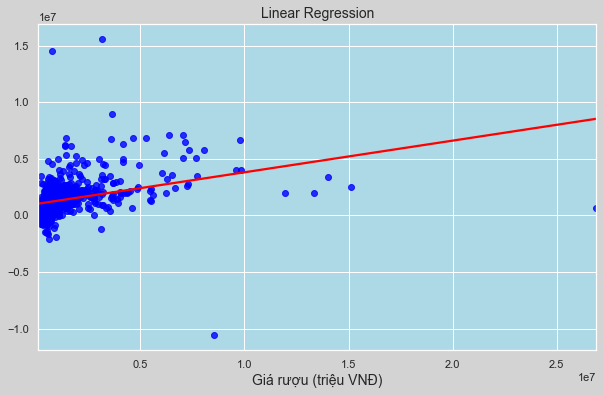

In [175]:
plt.figure(figsize=(10,6));
sns.regplot(x=y_test,y=lr_pred,ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"});
plt.title('Linear Regression', fontsize=14)
plt.xlabel('Giá rượu (triệu VNĐ)', fontsize=14)

<h3 style='color:#45ccb1d4;font-size:20px'><b>2. Decision Tree Regression</b></h3> 

#### Cross-validation

In [35]:
scores = cross_val_score(decision_tree_reg,X_train, y_train,cv = 10)
scores

array([-0.32119072, -0.41118965, -0.08873732, -0.10588448,  0.14556822,
        0.16988019,  0.12129275,  0.00987914,  0.09416919, -0.58070611])

In [36]:
scores.mean()

-0.09669187992860583

<h3 style='color:#45ccb1d4;font-size:20px'><b>3. Random Forest Regression</b></h3> 

#### Cross-validation

In [37]:
scores = cross_val_score(decision_tree_reg,X_train, y_train,cv = 10)
scores

array([ 0.00676593, -0.5498377 , -0.08994844, -0.0305511 , -0.00561003,
        0.17951719, -0.02535724, -0.23201733,  0.11088961, -0.58442604])

In [38]:
scores.mean()

-0.12205751509333802

#### Tinh chỉnh mô hình

In [67]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [5, 10, 15, 20]
}

In [68]:
grid_search = GridSearchCV(estimator = rf_reg, param_grid = param_grid, cv = 5)

In [69]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(max_depth=5),
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [5, 10, 15, 20]})

#### Chọn mô hình tốt nhất

In [72]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 20}

In [83]:
rf = RandomForestRegressor(n_estimators=20, bootstrap=False, max_depth=15, max_features='sqrt', min_samples_leaf=1, min_samples_split=4)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=15, max_features='sqrt',
                      min_samples_split=4, n_estimators=20)

In [90]:
rf_pred = rf.predict(X_test)

In [91]:
mse = mean_squared_error(y_test, y_pred)
mse

4603617996239.164

In [92]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

2145604.3428925015